# Fashion MNIST 
 
<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"  height='300' width='500'/>
 
 
Fashion MNIST is a collection of 28x28 images containing 70,000 grayscale images in 10 categories. In this notebook we will analyze this dataset using two diferent neural networks: a fully connected network and a convolutional network.

## Fully Connected Network

In [1]:
# imports for array-handling and plotting
%matplotlib inline

import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt

# fix random seed for reproducibility
np.random.seed(10)

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import fashion_mnist

## loads the dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
## Show the dimentions of the data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
y_train[0:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

<BarContainer object of 10 artists>

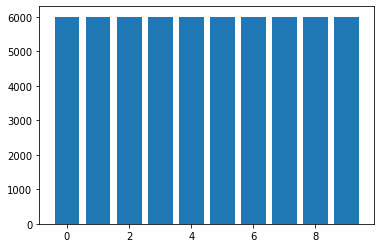

In [5]:
## How many classes and their counts
yn = np.unique(y_train, return_counts=True)
yn

## plot the frequency of y's
plt.bar(yn[0],yn[1])

We now check the first nine data rows (pictures) and check their labels:

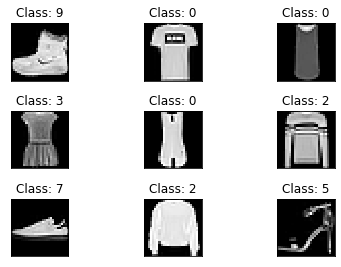

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:
<code> 
Label	Class
0	    T-shirt/top
1	    Trouser
2	    Pullover
3	    Dress
4	    Coat
5	    Sandal
6	    Shirt
7	    Sneaker
8	    Bag
9	    Ankle boot
</code> 
Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:               

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

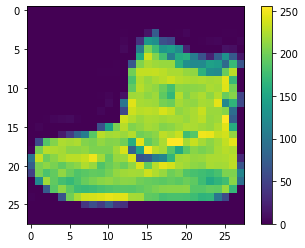

In [8]:
### images have values between 0 and 255

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

In [9]:
# normalizing the data to help with the training
X_train = X_train / 255
X_test = X_test / 255

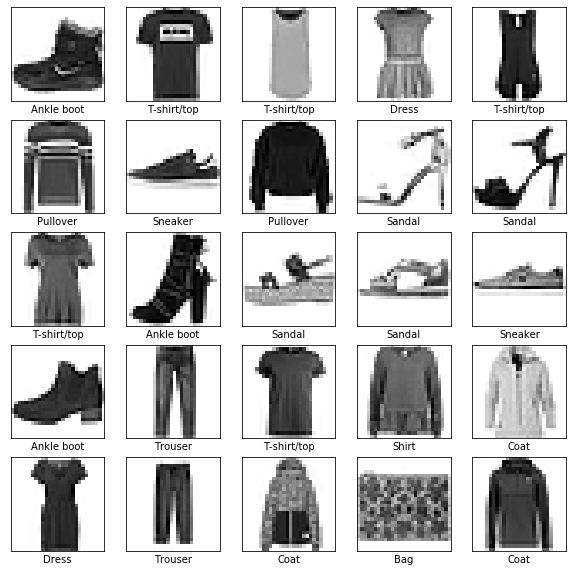

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])


Before procedding with the NN, we have to make a final transformation to the data: we have to change the format of the labels (y). For this we have to create an array of 10 positions for each y. Each position will indicate with a one if the y is the relevant category or zero if not:

<code>
y     ---->    Transformation
              0 1 2 3 4 5 6 7 8 9
0            [1,0,0,0,0,0,0,0,0,0]
1            [0,1,0,0,0,0,0,0,0,0]
    ...
8            [0,0,0,0,0,0,0,0,1,0]
9            [0,0,0,0,0,0,0,0,0,1]
</code>

This type of transformation is called one-hot encoding.

In [11]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### First model based on Categorical Crossentropy as loss function

Now we will compile the model

Now we will proceed to build the network architecture. Our input layer consist on:

 1. A two dimentional matrix of 28x28. We will use a flatten layer as the first layer, what gives a layer with 784 nodes. 
 2. Then we will use a fully connected layer (dense) with 128 nodes, followed with a relu  activation layer. 
 3. Then another fully connected layer of 10 nodes, activated with a softmax layer. 
 4. The output layer consist of 10 nodes.

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


In [13]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

and fit it...

In [14]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.5469 - acc: 0.8097 - val_loss: 0.4395 - val_acc: 0.8434
Epoch 2/20
 - 2s - loss: 0.4005 - acc: 0.8581 - val_loss: 0.4129 - val_acc: 0.8532
Epoch 3/20
 - 2s - loss: 0.3597 - acc: 0.8721 - val_loss: 0.3772 - val_acc: 0.8660
Epoch 4/20
 - 1s - loss: 0.3393 - acc: 0.8776 - val_loss: 0.3792 - val_acc: 0.8624
Epoch 5/20
 - 1s - loss: 0.3185 - acc: 0.8851 - val_loss: 0.3758 - val_acc: 0.8640
Epoch 6/20
 - 1s - loss: 0.3036 - acc: 0.8893 - val_loss: 0.3832 - val_acc: 0.8605
Epoch 7/20
 - 1s - loss: 0.2881 - acc: 0.8953 - val_loss: 0.3391 - val_acc: 0.8808
Epoch 8/20
 - 1s - loss: 0.2761 - acc: 0.8992 - val_loss: 0.3353 - val_acc: 0.8815
Epoch 9/20
 - 1s - loss: 0.2667 - acc: 0.9025 - val_loss: 0.3279 - val_acc: 0.8845
Epoch 10/20
 - 1s - loss: 0.2594 - acc: 0.9039 - val_loss: 0.3288 - val_acc: 0.8814
Epoch 11/20
 - 1s - loss

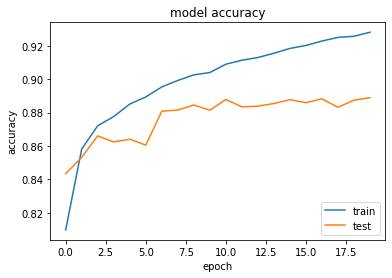

In [15]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

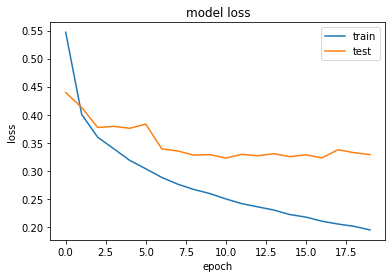

In [16]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


### Second model based on Sparse Categorical Crossentropy as loss function


In [17]:
# compiling the sequential model
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
##### here we use the labels without one-hot-encoding !!!

res = model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.1923 - acc: 0.9288 - val_loss: 0.3298 - val_acc: 0.8892
Epoch 2/20
 - 1s - loss: 0.1884 - acc: 0.9305 - val_loss: 0.3260 - val_acc: 0.8905
Epoch 3/20
 - 1s - loss: 0.1821 - acc: 0.9333 - val_loss: 0.3340 - val_acc: 0.8895
Epoch 4/20
 - 1s - loss: 0.1787 - acc: 0.9348 - val_loss: 0.3341 - val_acc: 0.8880
Epoch 5/20
 - 1s - loss: 0.1743 - acc: 0.9361 - val_loss: 0.3541 - val_acc: 0.8859
Epoch 6/20
 - 1s - loss: 0.1709 - acc: 0.9370 - val_loss: 0.3394 - val_acc: 0.8919
Epoch 7/20
 - 1s - loss: 0.1676 - acc: 0.9389 - val_loss: 0.3357 - val_acc: 0.8916
Epoch 8/20
 - 1s - loss: 0.1625 - acc: 0.9405 - val_loss: 0.3369 - val_acc: 0.8887
Epoch 9/20
 - 1s - loss: 0.1575 - acc: 0.9423 - val_loss: 0.3415 - val_acc: 0.8918
Epoch 10/20
 - 1s - loss: 0.1551 - acc: 0.9417 - val_loss: 0.3639 - val_acc: 0.8868
Epoch 11/20
 - 1s - loss: 0.1521 - acc: 0.9443 - val_loss: 0.3622 - val_acc: 0.8856
Epoch 12/20
 - 1s - loss: 0.1486 - 

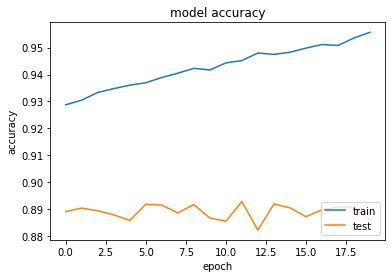

In [19]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

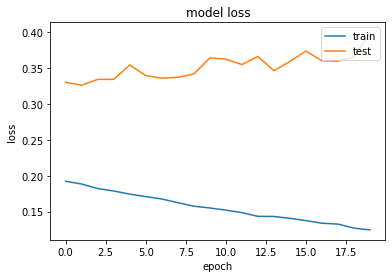

In [20]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


##  Third model - now we will add dropout layers

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.6644 - acc: 0.7676 - val_loss: 0.4847 - val_acc: 0.8295
Epoch 2/20
 - 2s - loss: 0.4885 - acc: 0.8243 - val_loss: 0.4389 - val_acc: 0.8460
Epoch 3/20
 - 2s - loss: 0.4490 - acc: 0.8387 - val_loss: 0.4119 - val_acc: 0.8497
Epoch 4/20
 - 2s - loss: 0.4242 - acc: 0.8458 - val_loss: 0.3920 - val_acc: 0.8585
Epoch 5/20
 - 2s - loss: 0.4076 - acc: 0.8501 - val_loss: 0.3826 - val_acc: 0.8622
Epoch 6/20
 - 2s - loss: 0.3920 - acc: 0.8568 - val_loss: 0.3672 - val_acc: 0.8687
Epoch 7/20
 - 2s - loss: 0.3852 - acc: 0.8569 - val_loss: 0.3666 - val_acc: 0.8667
Epoch 8/20
 - 2s - loss: 0.3757 - acc: 0.8608 - val_loss: 0.3612 - val_acc: 0.8732
Epoch 9/20
 - 2s - loss: 0.3702 - acc: 0.8621 - val_loss: 0.3511 - val_acc: 0.8722
Epoch 10/20
 - 2s - loss: 0.3654 - acc: 0.8654 - val_loss: 0.3450 - val_acc: 0.8751
Epoch 11/20
 - 2s - loss: 0.3591 - acc: 0.8668 - val_loss: 0.3506 - val_acc: 0.8731
Epoch 12/20
 - 2s - loss: 0.3555 - 

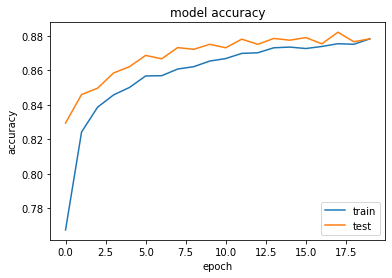

In [24]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

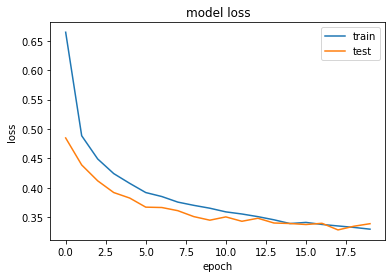

In [25]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fourth model - Additional layer



In [26]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.20))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.30))

model.add(Dense(10))
model.add(Activation('softmax'))


In [27]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [28]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.7638 - acc: 0.7309 - val_loss: 0.4770 - val_acc: 0.8293
Epoch 2/20
 - 2s - loss: 0.5082 - acc: 0.8190 - val_loss: 0.4189 - val_acc: 0.8476
Epoch 3/20
 - 2s - loss: 0.4624 - acc: 0.8332 - val_loss: 0.4216 - val_acc: 0.8458
Epoch 4/20
 - 2s - loss: 0.4385 - acc: 0.8427 - val_loss: 0.3887 - val_acc: 0.8617
Epoch 5/20
 - 2s - loss: 0.4203 - acc: 0.8467 - val_loss: 0.3831 - val_acc: 0.8620
Epoch 6/20
 - 2s - loss: 0.4096 - acc: 0.8502 - val_loss: 0.3707 - val_acc: 0.8664
Epoch 7/20
 - 2s - loss: 0.3960 - acc: 0.8543 - val_loss: 0.3739 - val_acc: 0.8607
Epoch 8/20
 - 2s - loss: 0.3928 - acc: 0.8572 - val_loss: 0.3542 - val_acc: 0.8727
Epoch 9/20
 - 2s - loss: 0.3827 - acc: 0.8610 - val_loss: 0.3492 - val_acc: 0.8753
Epoch 10/20
 - 2s - loss: 0.3709 - acc: 0.8650 - val_loss: 0.3556 - val_acc: 0.8713
Epoch 11/20
 - 2s - loss: 0.3705 - acc: 0.8646 - val_loss: 0.3544 - val_acc: 0.8716
Epoch 12/20
 - 2s - loss: 0.3655 - 

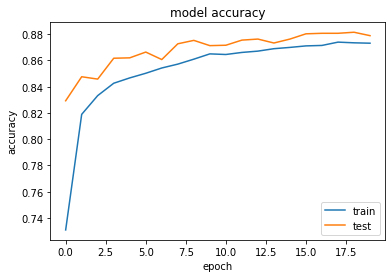

In [29]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

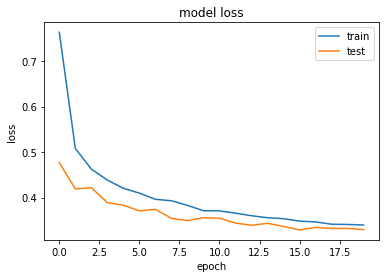

In [30]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fifth model - Convolutional Neural Networks


In [31]:
## data preprocessing

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [32]:
model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1),padding='same',activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())
          
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [33]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)        

In [35]:
res = model.fit(X_train, Y_train,
          batch_size=1000, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 12s - loss: 1.1503 - acc: 0.5745 - val_loss: 0.7188 - val_acc: 0.7338
Epoch 2/20
 - 12s - loss: 0.6587 - acc: 0.7495 - val_loss: 0.5595 - val_acc: 0.7899
Epoch 3/20
 - 12s - loss: 0.5660 - acc: 0.7895 - val_loss: 0.4965 - val_acc: 0.8167
Epoch 4/20
 - 13s - loss: 0.5093 - acc: 0.8126 - val_loss: 0.4399 - val_acc: 0.8401
Epoch 5/20
 - 14s - loss: 0.4646 - acc: 0.8300 - val_loss: 0.4044 - val_acc: 0.8557
Epoch 6/20
 - 15s - loss: 0.4362 - acc: 0.8405 - val_loss: 0.3894 - val_acc: 0.8628
Epoch 7/20
 - 15s - loss: 0.4109 - acc: 0.8506 - val_loss: 0.3589 - val_acc: 0.8725
Epoch 8/20
 - 15s - loss: 0.3918 - acc: 0.8585 - val_loss: 0.3427 - val_acc: 0.8782
Epoch 9/20
 - 15s - loss: 0.3741 - acc: 0.8634 - val_loss: 0.3313 - val_acc: 0.8805
Epoch 10/20
 - 14s - loss: 0.3607 - acc: 0.8681 - val_loss: 0.3220 - val_acc: 0.8821
Epoch 11/20
 - 12s - loss: 0.3501 - acc: 0.8713 - val_loss: 0.3152 - val_acc: 0.8855
Epoch 12/20
 - 12s - los

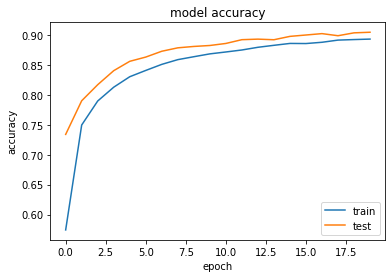

In [36]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

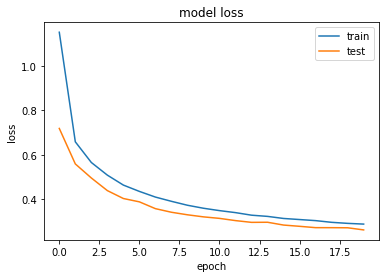

In [37]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


In [38]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(14,14))
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{} | Pred:{}".format(labels[y_test[indx]],labels[predicted_classes[indx]]))
    plt.show()    

In [39]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)


In [40]:
p = predicted_classes[:10000]
y = y_test[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [41]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9042
Incorrect predicted classes: 958


In [42]:
from sklearn.metrics import classification_report
#target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.81      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.86      0.86      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.82      0.85      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.69      0.74      0.72      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



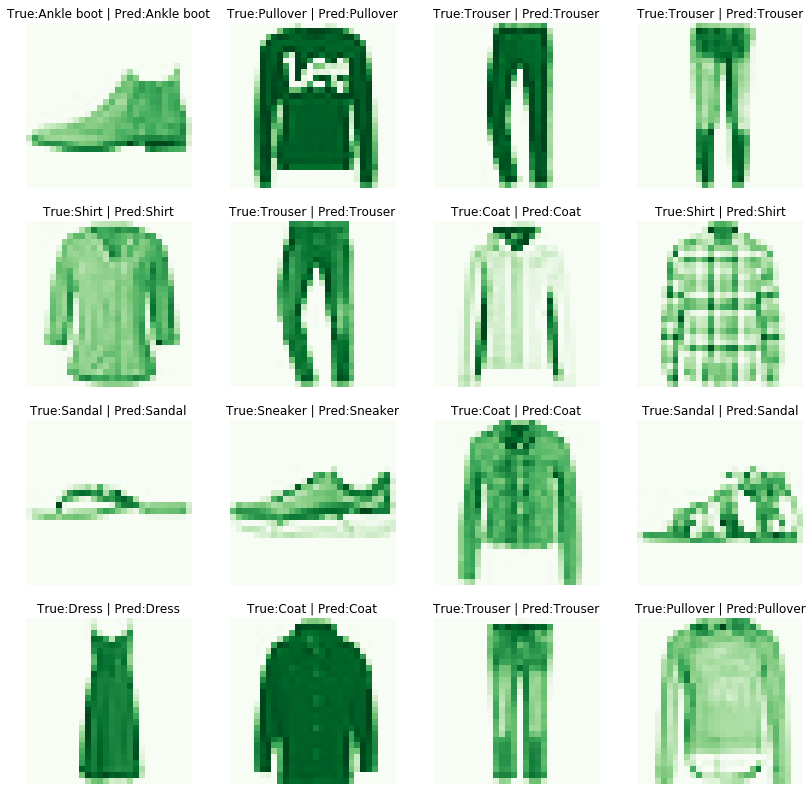

In [43]:
plot_images(correct, "Greens")

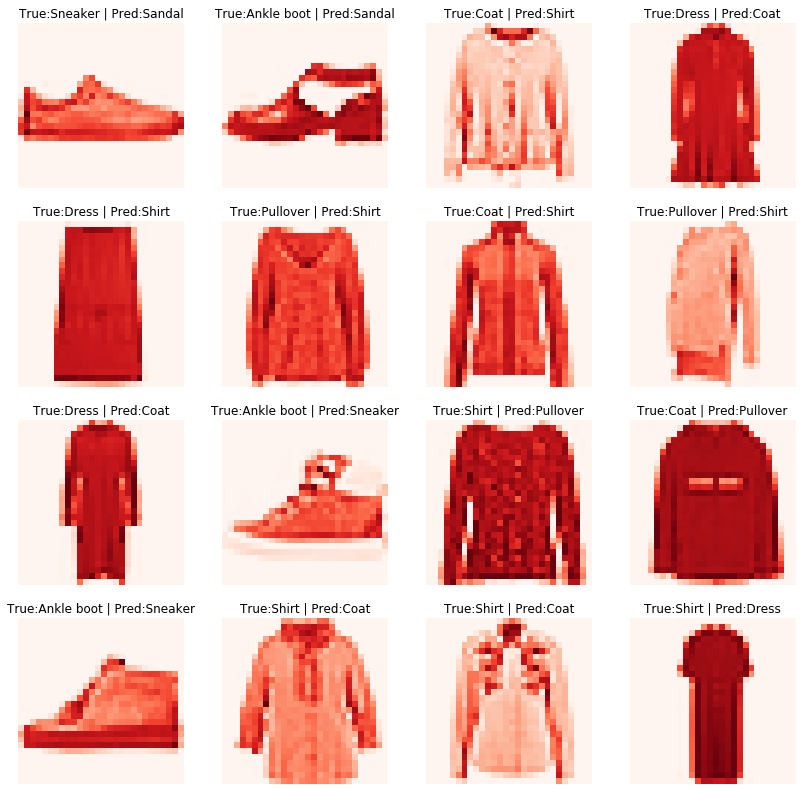

In [44]:
plot_images(incorrect, "Reds")